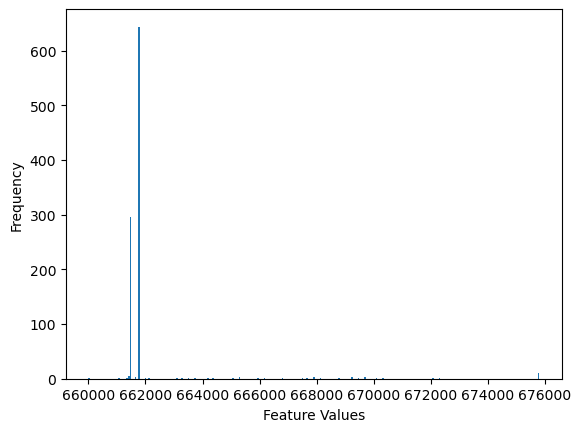

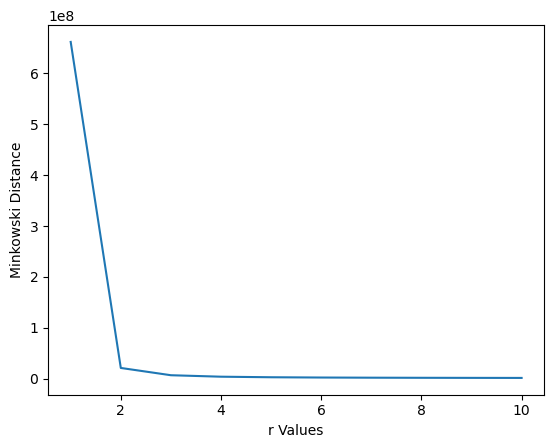

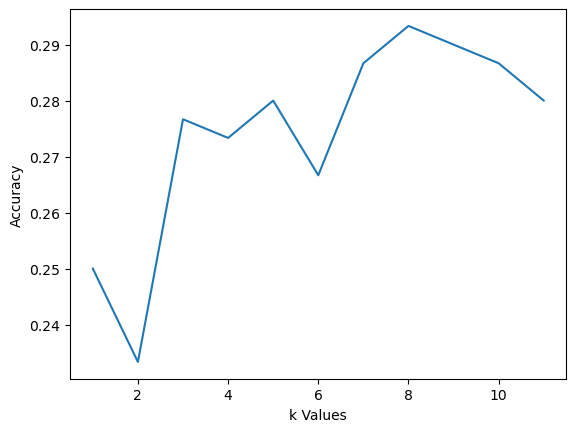

Confusion Matrix:
 [[ 9  2 11  1  1  5  4  0  2  4]
 [ 2 20  5  0  0  0  5  0  0  0]
 [ 3  2  6  4  1  2  1  1  1  2]
 [ 8  0  7  4  2  1  0  4  2  0]
 [ 2  0  3  2  4  0  0  5  4  1]
 [ 8  5  4  2  2  8  1  2  1  1]
 [ 6  3  6  4  1  0  9  0  0  1]
 [ 1  0  5  4  6  0  0 13  3  1]
 [ 2  0  7  3  4  0  2  3  9  2]
 [ 4  3  5  6  5  2  1  1  0  1]]
Precision: 0.29303416142157784
Recall: 0.2696169926620694
F1 Score: 0.2714569512563319


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from numpy.linalg import norm

# Load the dataset
dataset = pd.read_csv("C:/Users/USER/Desktop/assin ml/archive (6)/Data/features_30_sec.csv")

# A1. Evaluate Intraclass Spread and Interclass Distances

class1_data = dataset.iloc[:, 4].values
class2_data = dataset.iloc[:, 3].values

mean_class1 = np.mean(class1_data, axis=0)
mean_class2 = np.mean(class2_data, axis=0)

spread_class1 = np.std(class1_data, axis=0)
spread_class2 = np.std(class2_data, axis=0)

interclass_distance = norm(mean_class1 - mean_class2)

# A2. Observe Density Pattern for a Feature

feature_data = dataset.iloc[:, 1].values
plt.hist(feature_data, bins='auto')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()

feature_mean = np.mean(feature_data)
feature_variance = np.var(feature_data)

# A3. Calculate Minkowski Distance

feature_vector1 = dataset.iloc[:, 1].values
feature_vector2 = dataset.iloc[:, 2].values
r_values = range(1, 11)
distances = [minkowski(feature_vector1, feature_vector2, r) for r in r_values]

plt.plot(r_values, distances)
plt.xlabel('r Values')
plt.ylabel('Minkowski Distance')
plt.show()

# A4-A8. Train and Test kNN Classifier
X = dataset.iloc[:, 1:-1].values  # Exclude the first column
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)

predicted_classes = neigh.predict(X_test)

k_values = range(1, 12)
accuracy_values = []
for k in k_values:
    neigh_k = KNeighborsClassifier(n_neighbors=k)
    neigh_k.fit(X_train, y_train)
    accuracy_k = neigh_k.score(X_test, y_test)
    accuracy_values.append(accuracy_k)

plt.plot(k_values, accuracy_values)
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.show()

# A9. Evaluate Confusion Matrix and Other Metrics
conf_matrix = confusion_matrix(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes, average='macro')
recall = recall_score(y_test, predicted_classes, average='macro')
f1 = f1_score(y_test, predicted_classes, average='macro')

# Print or use the results as needed
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)